# EVA models

\begin{equation}
    		G_j(x)= G(x;\gamma_j,\sigma_j,\mu_j) = \exp\left\{-\left[1 + \gamma_j\left( \frac{x-\mu_j}{\sigma_j} \right) \right]^{-\frac{1}{\gamma_j}}  \right\} ,
\end{equation}

\begin{equation}
			G_{\mathbb{S}}(x;\omega) = \sum_{j = 1}^{p} \omega_j G_j(x),
\end{equation}

\begin{equation}
			G_{\mathbb{P}}(x;\omega) = \prod_{j = 1}^{p} G_j^{\omega_j}(x).
\end{equation}

\begin{equation}
			\lim_{n\rightarrow +\infty} \left[G_{\mathbb{S}}\left(u_n(x)\right)\right]^n = G_{\mathbb{P}}(x),
\end{equation}

<p style="text-align: center;"> where $u_n(x)$ is a strictly increasing sequence. </p>

$ $\\

<p style="text-align: center;"> Maximum likelihood function </p>

\begin{equation}
			L(\mu, \sigma, \gamma, \omega) = \prod_{i = 1}^{n}g_{\mathbb{S}}\left(x_i; \mu, \sigma, \gamma, \omega  \right),
\end{equation}

<p style="text-align: center;"> $x_1, \cdots, x_n$ is a sample of observed large values associated with an unknown random variable, </p>

<p style="text-align: center;"> where $\omega = (\omega_1,\cdots,\omega_p),$ 
                                      $\mu = (\mu_1,\cdots,\mu_p),$
                                      $\sigma = (\sigma_1,\cdots,\sigma_p),$
                                      $\gamma = (\gamma_1,\cdots,\gamma_p),$</p>

\begin{equation}
			g_{\mathbb{S}}\left(x_i; \mu, \sigma, \gamma, \omega  \right) = \sum_{j = 1}^{p} \omega_j g_j\left(x_i; \mu_i, \sigma_i, \gamma_i  \right).
\end{equation}

<p style="text-align: center;"> Consider the particular case where $\omega_j = \frac{1}{p}.$ </p>

# Internal functions

In [1]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_unimodal_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_ns_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_unimodal_ns_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_ns_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_full_ns_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/get_full_ns_gev_mixture_model_cdf.R"))

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>)

In [2]:
options(repr.plot.width=19, repr.plot.height=12)

# Example 1

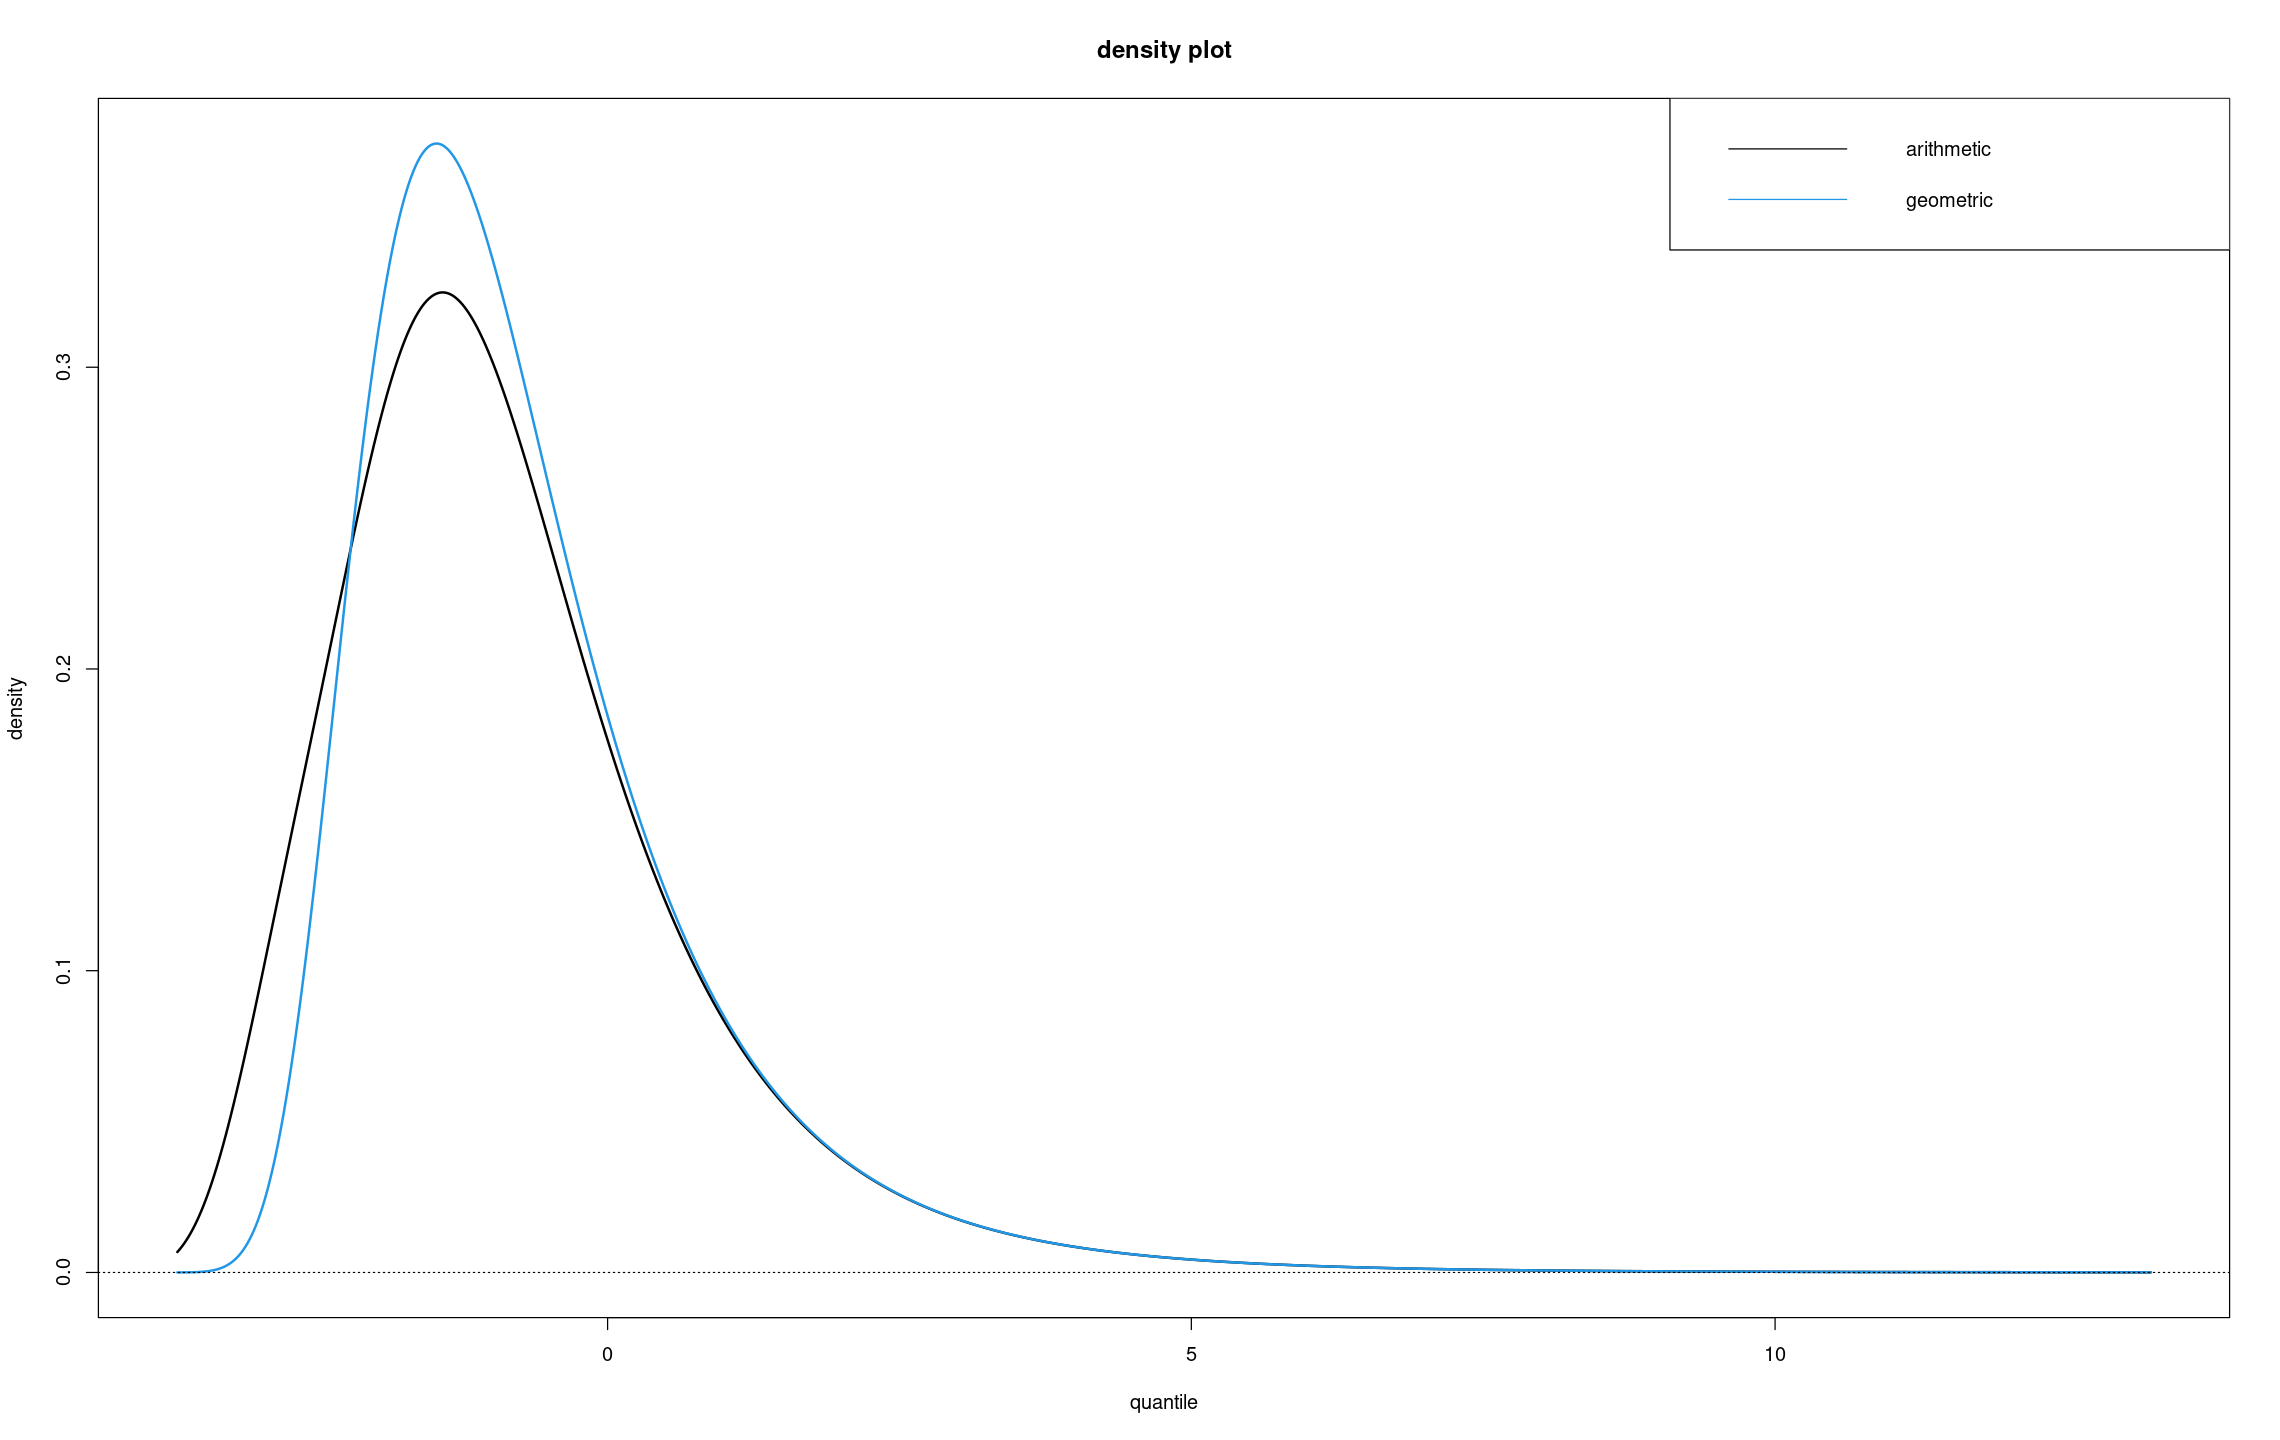

In [3]:
weights <- c(0.5, 0.5)

shapes <- c(0.1, 0.1)
scales <- c(1, 1)
locations <- c(-2, -1)

n <- 2000

sample_1 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

sample_2 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[1])

x <- c(sample_1, sample_2)

support <- seq(from = min(x), to = max(x), length.out = n)

pdf_1 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[2])

pdf_2 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[1])

plot(support, pdf_1, type = "l", 
     ylim = range(c(pdf_1, pdf_2)), 
     xlim = range(support), 
     lwd = 2, xlab = "quantile", ylab = "density", 
     main = "density plot")
lines(support, pdf_2, type = "l", col = 4, lwd = 2)
legend("topright", legend = c("arithmetic", "geometric"), col = c(1, 4), lty = c(1, 1))
abline(h = 0, lty = "dotted")


# Example 2

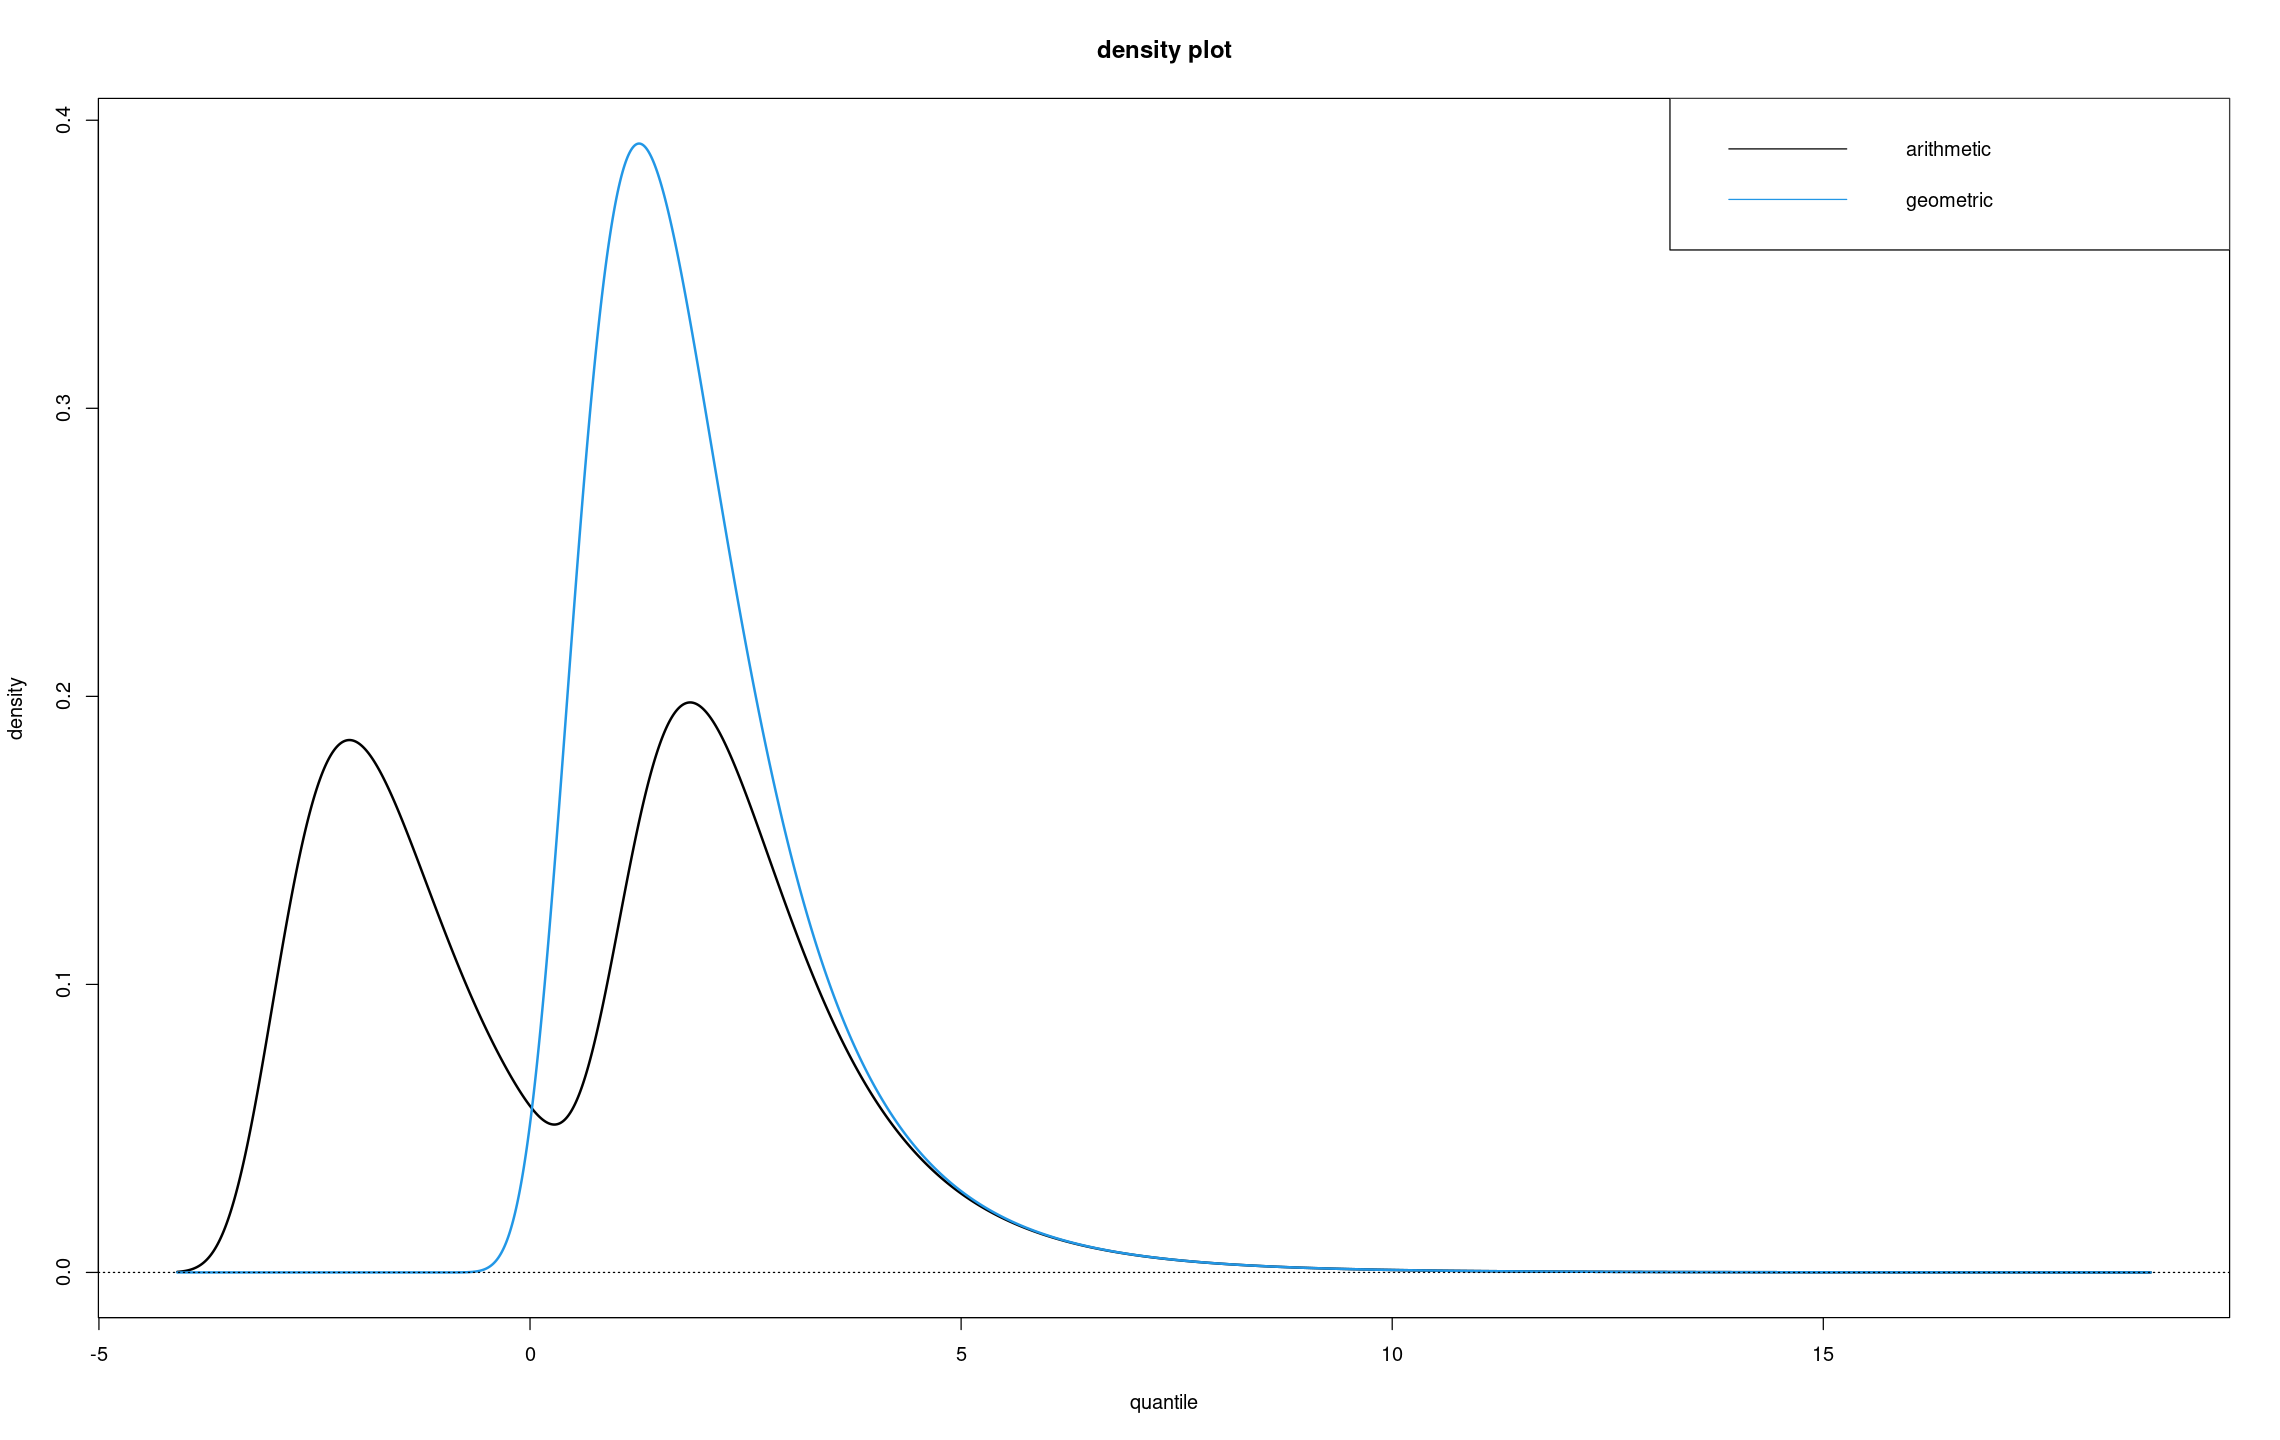

In [4]:
weights <- c(0.5, 0.5)

shapes <- c(0.1, 0.1)
scales <- c(1, 1)
locations <- c(-2, +2)

n <- 2000

sample_1 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

sample_2 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[1])

x <- c(sample_1, sample_2)

support <- seq(from = min(x), to = max(x), length.out = n)

pdf_1 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[2])

pdf_2 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[1])

plot(support, pdf_1, type = "l", 
     ylim = range(c(pdf_1, pdf_2)), 
     xlim = range(support), 
     lwd = 2, xlab = "quantile", ylab = "density", 
     main = "density plot")
lines(support, pdf_2, type = "l", col = 4, lwd = 2)
legend("topright", legend = c("arithmetic", "geometric"), col = c(1, 4), lty = c(1, 1))
abline(h = 0, lty = "dotted")


# Example 3

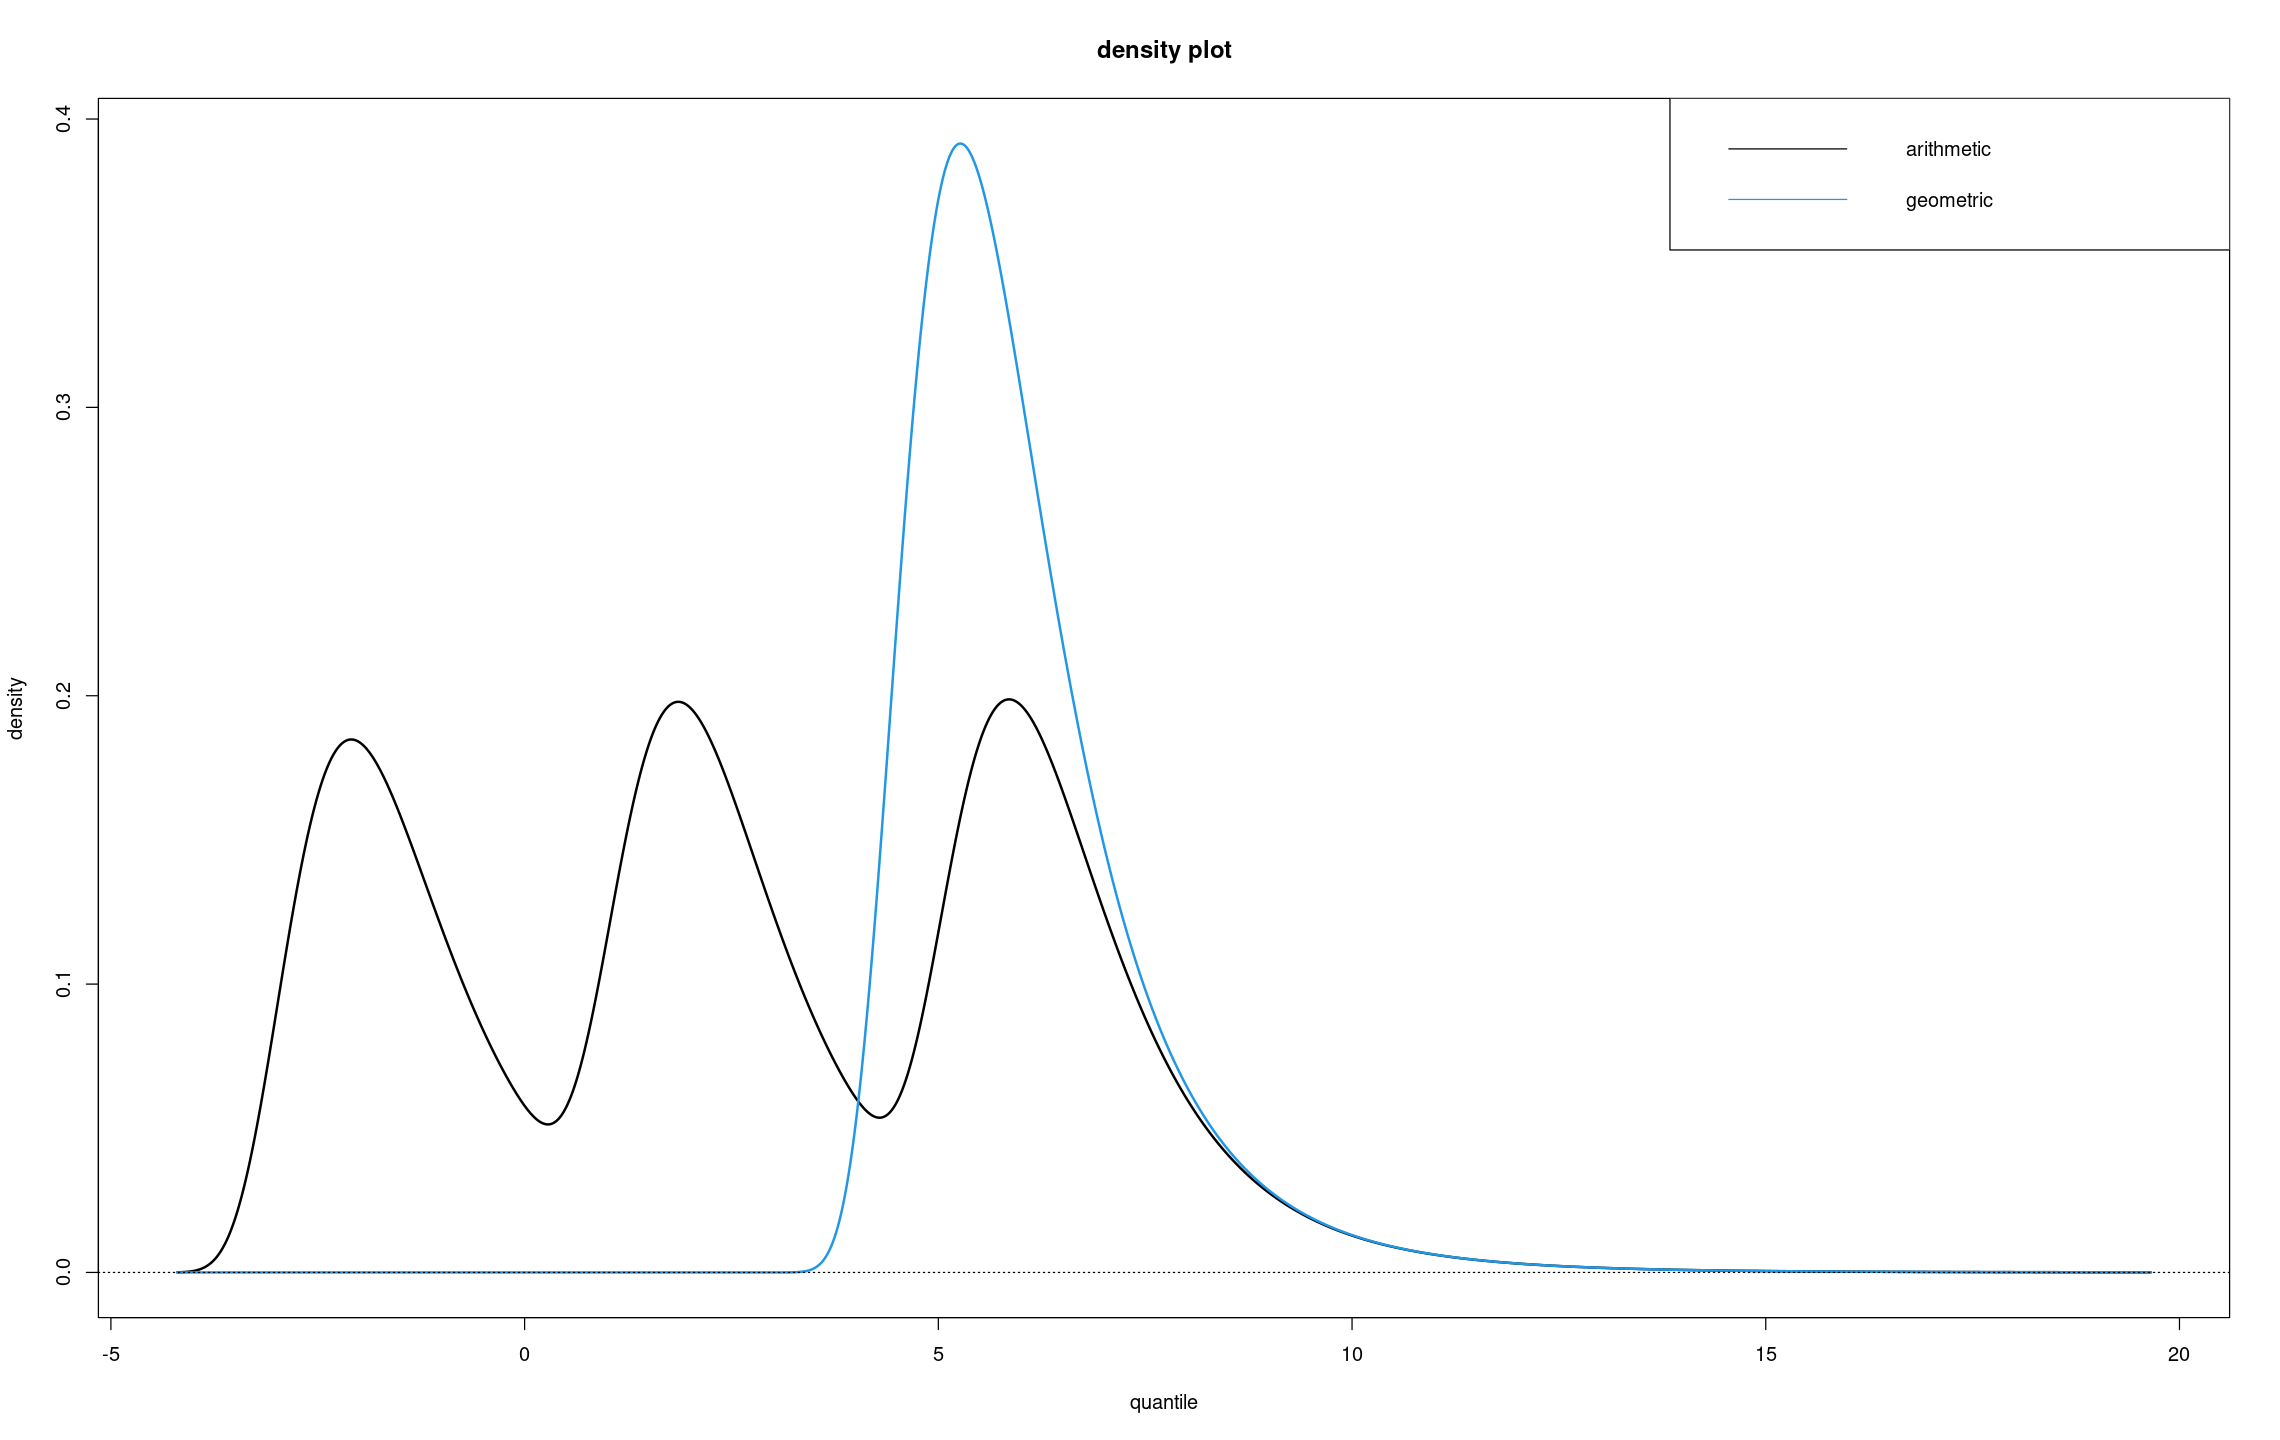

In [5]:
weights <- c(0.5, 0.5, 0.5)

shapes <- c(0.1, 0.1, 0.1)
scales <- c(1, 1, 1)
locations <- c(-2, +2, +6)

n <- 3000

sample_1 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

sample_2 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[1])

x <- c(sample_1, sample_2)

support <- seq(from = min(x), to = max(x), length.out = n)

pdf_1 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[2])

pdf_2 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[1])

plot(support, pdf_1, type = "l", 
     ylim = range(c(pdf_1, pdf_2)), 
     xlim = range(support), 
     lwd = 2, xlab = "quantile", ylab = "density", 
     main = "density plot")
lines(support, pdf_2, type = "l", col = 4, lwd = 2)
legend("topright", legend = c("arithmetic", "geometric"), col = c(1, 4), lty = c(1, 1))
abline(h = 0, lty = "dotted")


# Example 4

In [70]:
weights <- c(0.5, 0.5, 0.5)

shapes <- c(0.1, 0.1, 0.1)
scales <- c(1, 1, 1)
locations <- c(-2, +2, +6)

n <- 3000

x <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

In [22]:
weights <- c(0.5, 0.5)

shapes <- c(0.1, 0.1)
scales <- c(1, 1)
locations <- c(-2, +2)

n <- 2000

x <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

In [51]:
weights <- c(0.5, 0.5)

shapes <- c(0.1, 0.1)
scales <- c(1, 1)
locations <- c(-2, -1)

n <- 2000

x <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

In [71]:
modes_object <- calculate_modes(x = x)

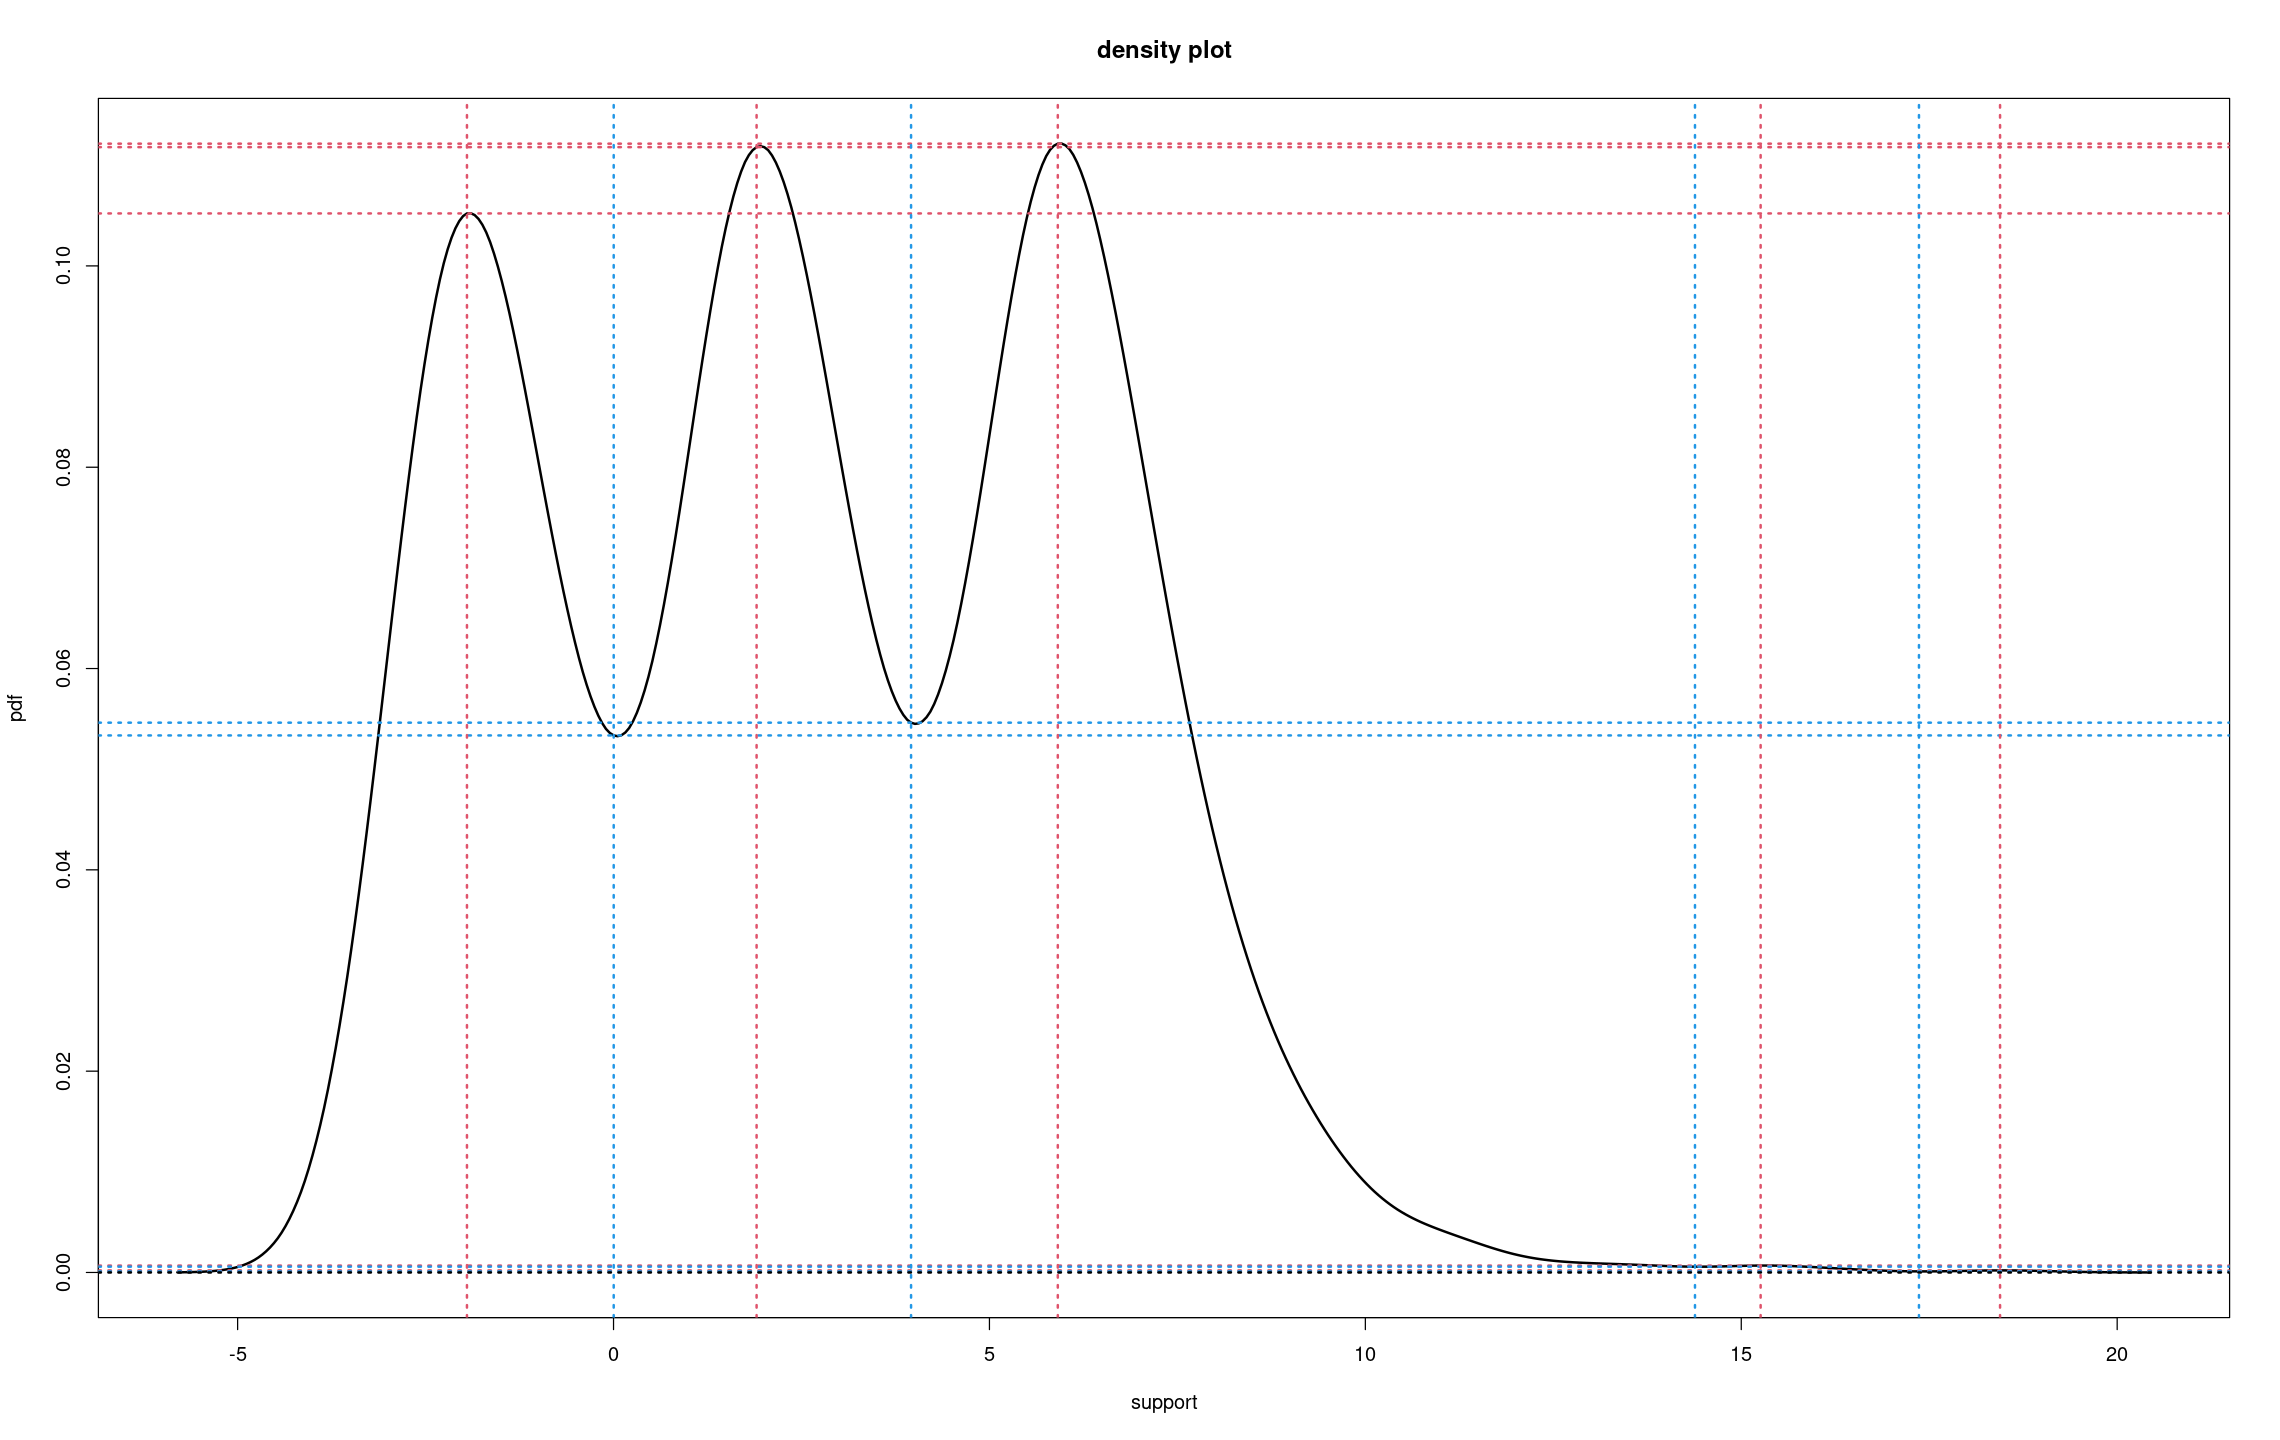

In [72]:
plot_modes(modes_object)

In [73]:
p <- 3

gev_mixture_model <- fit_gev_mixture_model(x = x,
                                 nb_gev_models = p,
                                 min_cluster_size = 20,
                                 max_iteration = 40,
                                 left_cluster_extension_size = 20,
                                 right_cluster_extension_size = 20,
                                 tolerance = 10^(-3))

[1] "Iteration: 2, Tolerance: 1.44154391199118"
[1] "Iteration: 3, Tolerance: 0.657139989069037"
[1] "Iteration: 4, Tolerance: 0.222486119919267"
[1] "Iteration: 5, Tolerance: 0.217919091244767"
[1] "Iteration: 6, Tolerance: 0.476607742521082"
[1] "Iteration: 7, Tolerance: 0"


In [68]:
p <- 5

gev_mixture_model <- fit_unimodal_gev_mixture_model(x = x,
                                 nb_gev_models = p,
                                 min_cluster_size = 20,
                                 max_iteration = 40,
                                 left_cluster_extension_size = 20,
                                 right_cluster_extension_size = 20,
                                 tolerance = 10^(-3))

[1] "Iteration: 2, Tolerance: 0"


In [75]:
print(names(gev_mixture_model))

 [1] "last_iteration"                  "last_tolerance"                 
 [3] "nclusters"                       "cluster_sizes"                  
 [5] "cluster_weights"                 "cluster_negative_loglikelihoods"
 [7] "information_criterions"          "cluster_gev_model_parameters"   
 [9] "clusters"                        "data"                           
[11] "cluster_models"                 


In [76]:
print(gev_mixture_model$nclusters)

[1] 3


In [77]:
print(gev_mixture_model$cluster_sizes)

   1    2    3 
 874  975 1151 


In [78]:
print(gev_mixture_model$information_criterions)

        AIC         BIC 
9228.382662 9282.439970 


In [79]:
print(gev_mixture_model$cluster_gev_model_parameters)

                  [,1]          [,2]          [,3]
location -2.0744083247  1.7093728033 5.72725507997
scale     0.8370616294  0.9760118419 1.16819334318
shape    -0.2184191362 -0.2962472602 0.03493028527


In [80]:
print(gev_mixture_model$cluster_weights)

[1] 0.2913333333 0.3250000000 0.3836666667


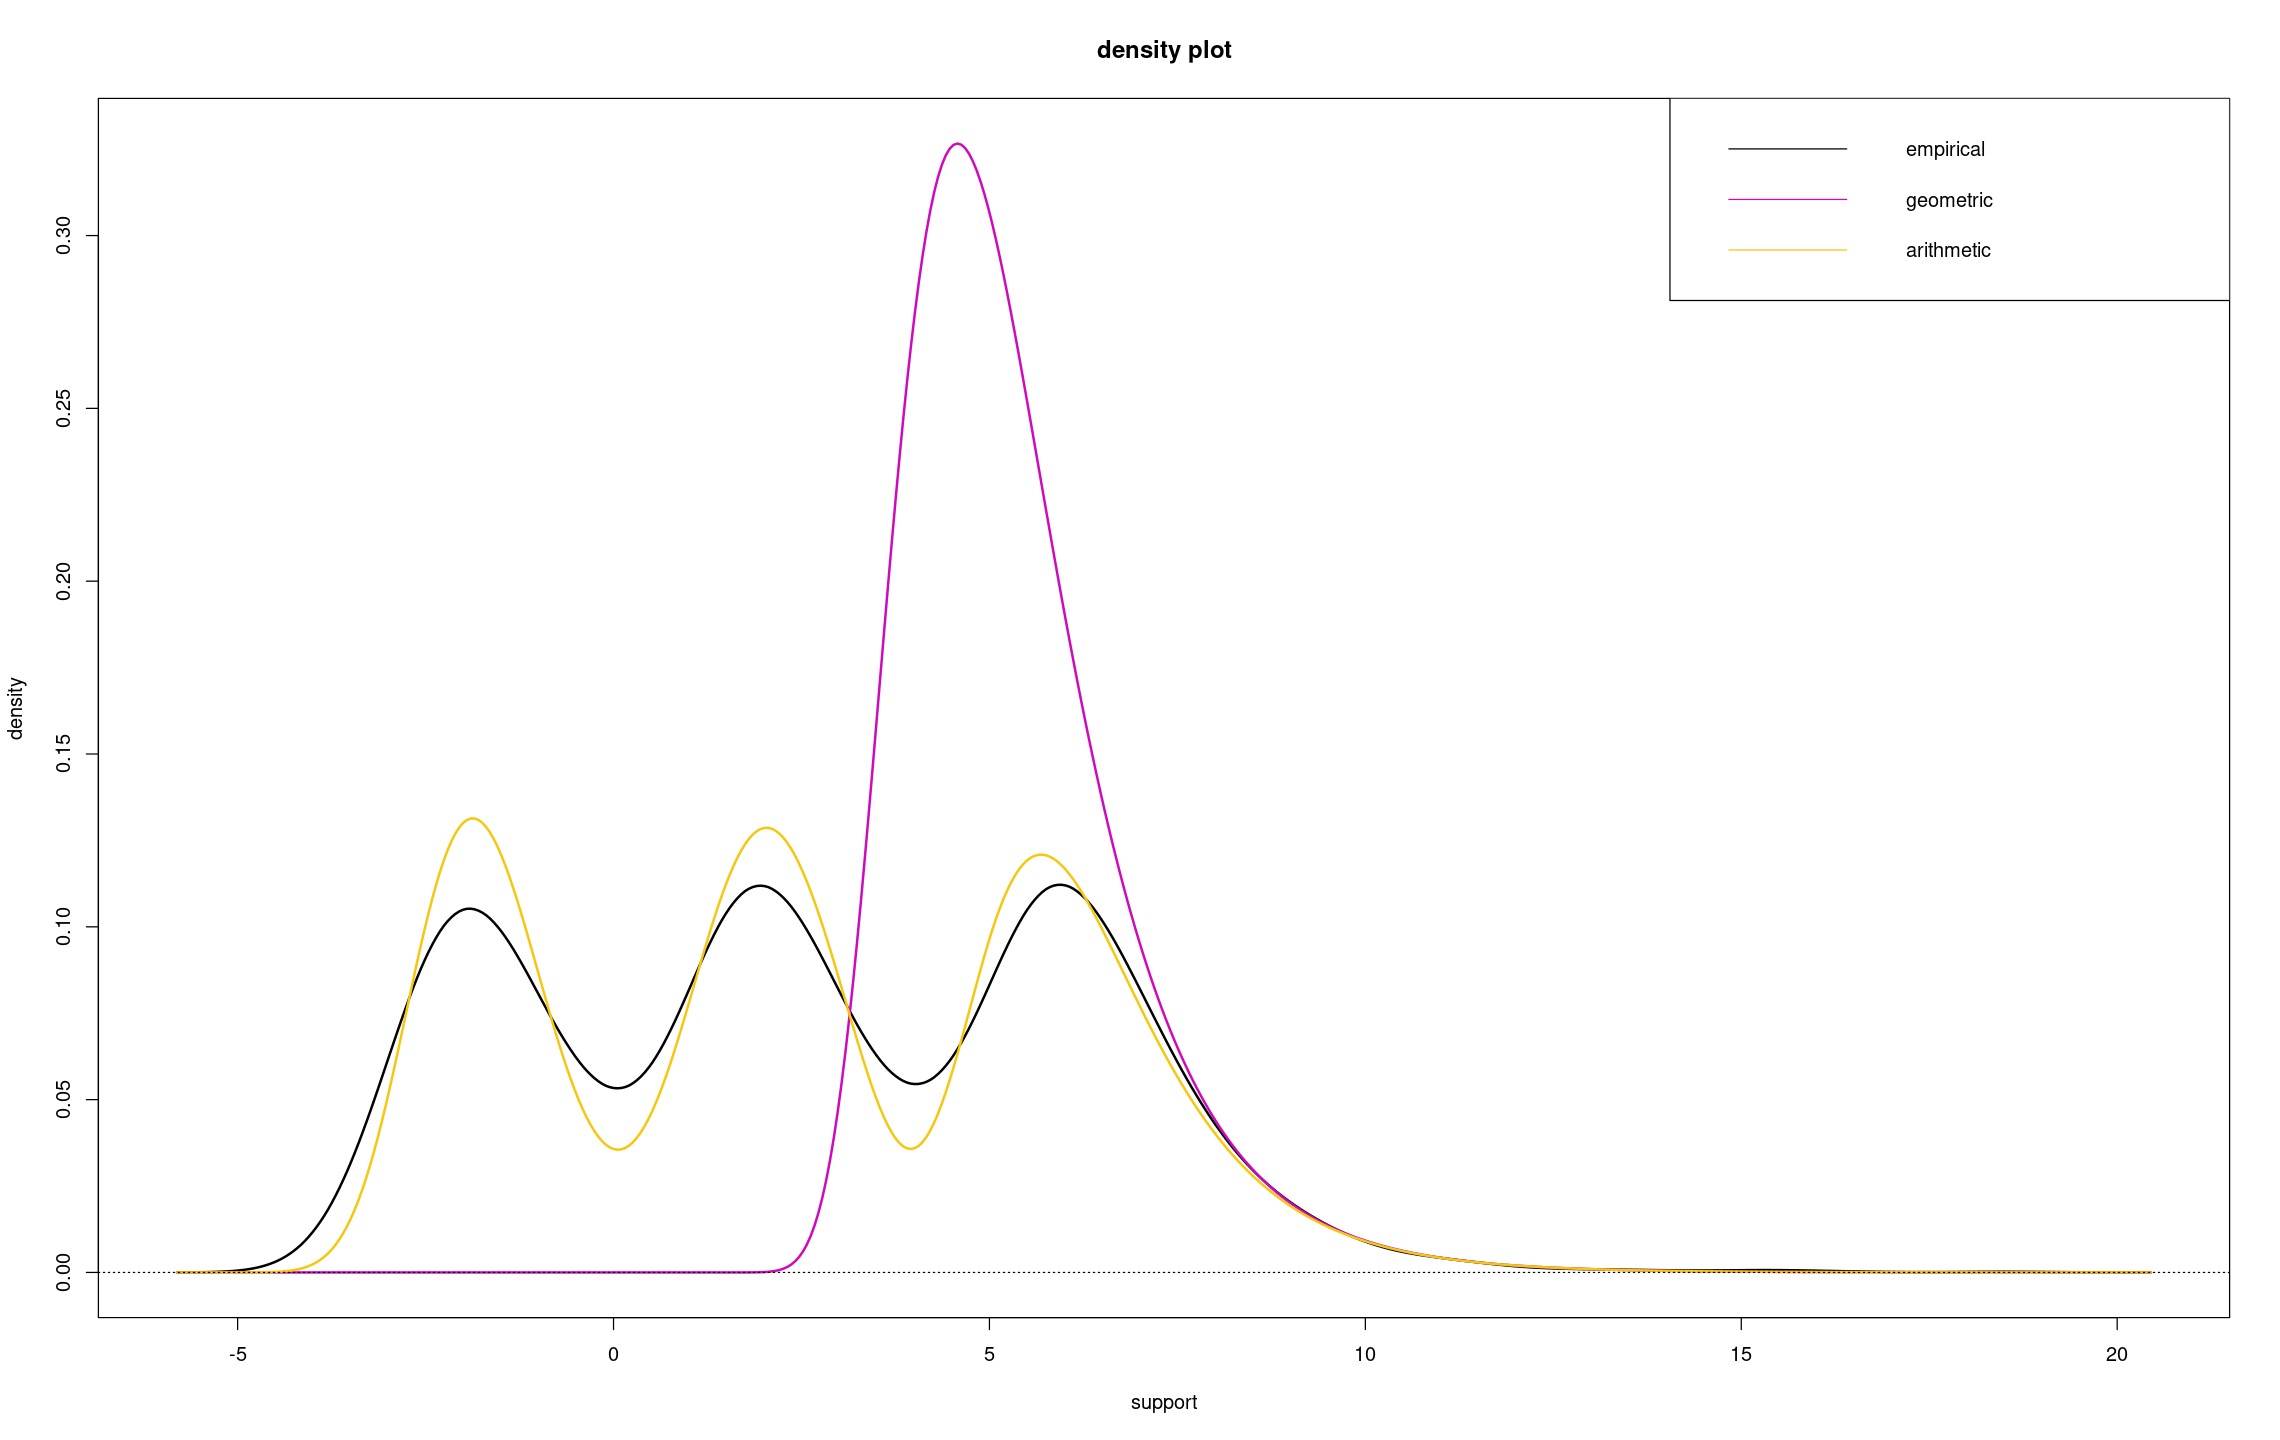

In [81]:
plot_fit_gev_mixture_model(gev_mixture_model)